# Explore Exercises

## Review of Exploratory Data Analysis

### Goals of EDA

We explore the interactions of the attributes and target variable to help discover drivers of our target variable and redundant or interdependent attributes.

1. Discover features that are driving the outcome (target). (Number 1 reason to explore)
2. Learn the vast majority of our takeaways and interesting stories from the data.
3. Discover if we need to drop features, if we need to handle missing values, or if there's value to combining features.

<hr style="border:1px solid black">

### EDA Process

1. Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable). You can do this in the form of questions in a natural language (as opposed to "statistical" language).

2. Visualize: use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

3. Test your hypotheses when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)

### General Recipe

1. <b>Univariate Stats</b>: descriptive stats, frequencies, histograms. **We recommend doing this during prep prior to splitting into train/validate/test**, but if it is not, then it should be done first here. Why? Outliers. Running tests that assume normalcy. Scale of each variable. General "getting to know" your data.
    - Univariate means a single variable, so we'll look at .value_counts() and histograms.
    - Explore the target variable itself. What is the distribution of values?
    - Explore the categorical and qualitative variables.
    - Explore the numeric variables.
<br>
<br>
2. <b>Bivariate Stats</b>: Bivariate means two variables.
    - Plot the interactions of each variable with the target. Document your takeaways.
    - Explore interation of independent variables using viz and/or hypothesis testing to address interdependence.
<br>
<br>
3. <b>Multivariate Stats</b> (more than 2 variables): Ask additional questions of the data, such as how subgroups compare to each-other and to the overall population. Answer questions using visualizations and/or hypothesis testing.
    - use color to represent a discrete variable and then choose a chart style based on the data types of other two variables.
<br>
<br>
4. <b>Statistical Tests</b>: If the visualizations are not crystal clear, it's important to conduct hypothesis tests.
    - With numeric to numeric, test for correlation with Pearson's R for linear and Spearman's R for non-linear relationships.
    - For numeric to categorical, compare the means of two populations or a subgroup to the population using a t-test, if your samples are normaly(ish) distributed but have different variances (as determined by calling .var() on each column/Series, ANOVA to compare means from more than 2 groups, or a Mann-Whitney u-test if the data does not match the assumptions of a t-test.
    - With categorical to categorical variables, use , chi-squared test.
    
<hr style="border:1px solid black">

### Standing Orders for Exploration

- Document your initial questions or assumptions. Write them down (in your README or notebook) so they are concrete and not in your head.

- Document your takeaways after each visualization. Even if your takeaway is, "there is nothing interesting between var1 and target".

- Document your answer to each question.

- When you run statistical tests to answer your questions, Document your null and alternative hypothesis, the test you run, the test results, and your conclusion.

- Document your takeaways, in case that wasn't clear. It is a huge component of your final deliverable/analysis.

- Document your action plan. What are your next steps and/or new questions based on what you have learned? I recommend documenting, continuing through all of your questions, and then going back and taking action only after you have answered your initial questions.

**imports**

In [1]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split

## Part 1

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

**Planning:**
Can we determine what type of Iris is being examined based on metrics taken from a study of three different species of the flower? Do we have significant indicators of what type of species we encounter based on petal or sepal lengths.

**Acquire, prepare & split your data.**

In [3]:
def get_connection(db, user=env.username, 
                   host=env.host, 
                   password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def get_data():
    return pd.read_sql(query, get_connection('iris_db'))

query = 'select m.sepal_length, m.sepal_width,\
            m.petal_length, m.petal_width, \
            s.species_name as species \
            from measurements m \
            left join species s  using(species_id);'

df = get_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
def train_validate_test_split(df):
    train_validate, test = train_test_split(df, train_size=.80, 
                                            random_state=123, 
                                            stratify=df.species)

    train, validate = train_test_split(train_validate, 
                                       train_size=.70, 
                                       random_state=123, 
                                       stratify=train_validate.species)
    return train, validate, test

In [7]:
train, validate, test = train_validate_test_split(df)

train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

**Univariate Stats**

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [10]:
# train['sepal_width'].dtype != 'object'
[train[col].dtype != 'object' for col in train.columns]

[True, True, True, True, False]

In [ ]:
# identify the columns that are numeric
# then filter the df by those column names

num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
num_cols

# loop through each numeric column and plot a histogram and boxplot 
# and compute descriptive stats. 

# but before doing that, make it work for one variable

# histogram
col = 'sepal_length'
plt.hist(train[col])
plt.title(col)
plt.ylabel('frequency')
plt.show()

# boxplot
plt.boxplot(train[col])
plt.ylabel(col)
plt.show()

# descriptive statistics
train[col].describe()

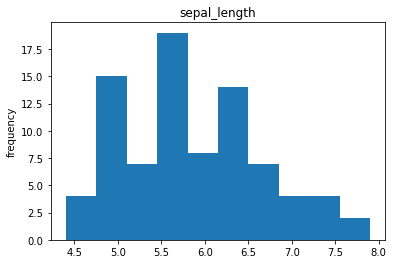

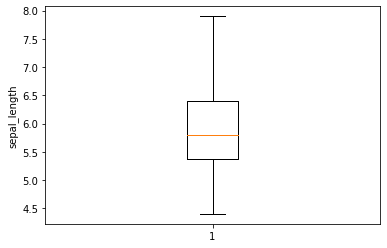

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


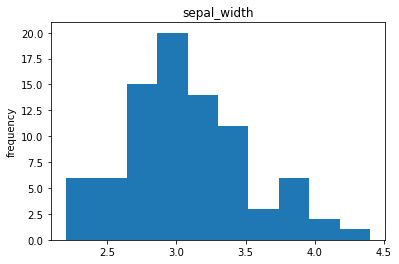

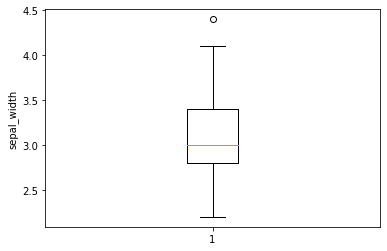

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


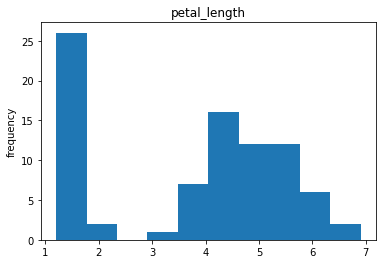

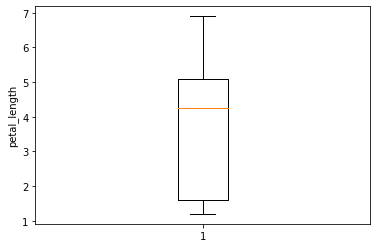

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


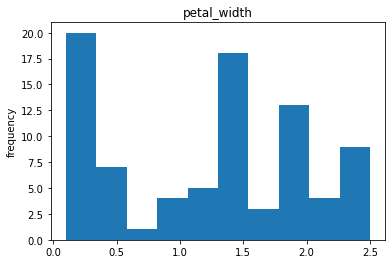

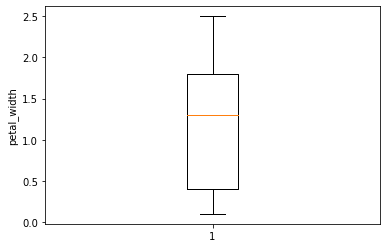

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [20]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()

    # boxplot
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()

    # descriptive statistics
    print(train[col].describe())

    

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>
- Sepal Length and Width are normally distributed <br>
<br>
- Petal Length and Width are bimodal with wide inner quartile range <br>
</div>

**Bivariate Stats**

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

In [29]:
# barplot with horizonal line of overall mean for sepal_length
# col='sepal_length'
# sns.barplot(x='species', y=col, data=train)
# plt.title(f'Average {col} for each species')
# mean_sepal_length = train.sepal_length.mean()
# plt.axhline(mean_sepal_length, label=f'Mean {col}', 
#             color='rebeccapurple', linestyle='dotted')
# plt.legend()
# plt.show()

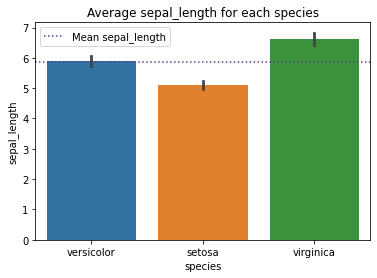

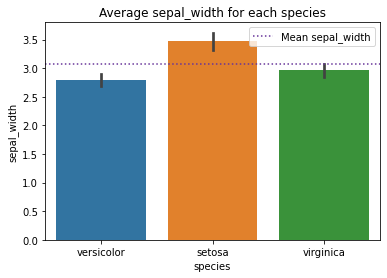

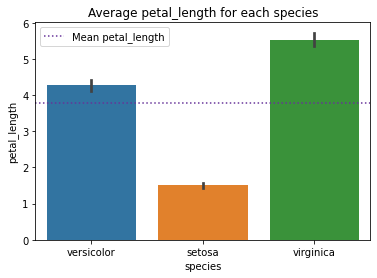

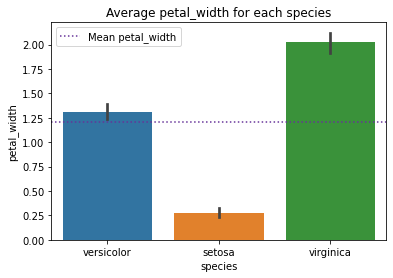

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.089286    5.896429   6.625000
             std     0.360390    0.425556   0.532378
             min     4.400000    4.900000   5.800000
             25%     4.875000    5.600000   6.300000
             50%     5.000000    5.800000   6.450000
             75%     5.400000    6.125000   6.900000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.467857    2.796429   2.960714
             std     0.427788    0.280848   0.318956
             min     2.300000    2.300000   2.200000
             25%     3.275000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.800000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.507143    4.271429   5.535714
             std     0.184448    0.409930   0.496815
             min     1.200000    3.300000   4.800000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.250000   5.500000
             75%     1.600000    4.525000   5.800000
             max     1.900000    5.100000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.275000    1.314286   2.021429
             std     0.120570    0.199470   0.293582
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.400000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [28]:
# now do that for each variable: barplot with species on x and var on y
col='sepal_length'
for col in num_cols:
    sns.barplot(x='species', y=col, data=train)
    plt.title(f'Average {col} for each species')
    overall_mean = train[col].mean()
    plt.axhline(overall_mean, label=f'Mean {col}', 
                color='rebeccapurple', linestyle='dotted')
    plt.legend()
    plt.show()
    
# compute the descriptive stats
train.groupby('species').describe().T

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

H_0: There is no significant difference in the mean petal width for Virginica vs Versicolor. 

H_a: There is a significant difference in the mean petal width for Virginica vs. Versicolor. 

In [35]:
alpha = 0.05

t, p = stats.mannwhitneyu(train[train.species=='virginica'].petal_width, 
                          train[train.species=='versicolor'].petal_width
                         )

if p < alpha:
    print("Reject null hypothesis, there is a significant difference")
    print("p-value: ", p)
else:
    print("There is not enough evidence to reject the null hypothesis")
    print("p-value: ", p)

Reject null hypothesis, there is a significant difference
p-value:  3.235595834904965e-10


<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br> - Sepal Length: Virginica - longest, Setosa - shortest 
<br> - Sepal Width: Versicolor - Shortest, Setosa - longest
<br> - Petal Length: Virginica - much longer, Setosa - much shorter
<br> - Petal Width: Virginica - much longer, Setosa - much shorter
<br> - It seems like it will be pretty easy to distinguish between Virginica and Setosa, but Versicolor may blend between the 2. 
<br> - Setosa can be classified by using petal_length alone. 
<br> - There appears to be a significant difference in the petal width of Virginica and Versicolor flowers.
</div>

**Multivariate Stats**

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>

## Part II

Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>

## Part III

Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

<div class="alert alert-block alert-success">
<b> Takeaways</b>:
<br>

</div>